In [1]:
using Pkg
Pkg.activate("../envs/data")
Pkg.instantiate()

Activating environment at `~/projects/julia-performance/envs/data/Project.toml`
  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


In [16]:
using DataFrames, CSV
using Query

┌ Info: Precompiling Query [1a8c2f83-1ff3-5112-b086-8aa67b057ba1]
└ @ Base loading.jl:1242


In [3]:
using Gadfly
set_default_plot_size(9inch,9inch/MathConstants.golden);

┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1242
┌ Warning: `lgamma(x::Real)` is deprecated, use `(logabsgamma(x))[1]` instead.
│   caller = lstirling_asym(::BigFloat) at misc.jl:56
└ @ StatsFuns ~/.julia/packages/StatsFuns/2QE7p/src/misc.jl:56


In [4]:
;head housing.csv

Neighborhood,Building.Classification,Total.Units,Year.Built,Gross.SqFt,Estimated.Gross.Income,Gross.Income.per.SqFt,Estimated.Expense,Expense.per.SqFt,Net.Operating.Income,Full.Market.Value,Market.Value.per.SqFt,Boro
FINANCIAL,R9-CONDOMINIUM,42,1920,36500,1332615,36.51,342005,9.37,990610,7300000,200,Manhattan
FINANCIAL,R4-CONDOMINIUM,78,1985,126420,6633257,52.47,1762295,13.94,4870962,30690000,242.76,Manhattan
FINANCIAL,RR-CONDOMINIUM,500,NA,554174,17310000,31.24,3543000,6.39,13767000,90970000,164.15,Manhattan
FINANCIAL,R4-CONDOMINIUM,282,1930,249076,11776313,47.28,2784670,11.18,8991643,67556006,271.23,Manhattan
TRIBECA,R4-CONDOMINIUM,239,1985,219495,10004582,45.58,2783197,12.68,7221385,54320996,247.48,Manhattan
TRIBECA,R4-CONDOMINIUM,133,1986,139719,5127687,36.7,1497788,10.72,3629899,26737996,191.37,Manhattan
TRIBECA,R4-CONDOMINIUM,109,1985,105000,4365900,41.58,1273650,12.13,3092250,22210281,211.53,Manhattan
TRIBECA,R4-CONDOMINIUM,107,1986,87479,3637377,41.58,1061120,12.13,2576257,1944

In [5]:
housing = CSV.read("housing.csv")

2626×13 DataFrame. Omitted printing of 10 columns
│ Row  │ Neighborhood         │ Building.Classification │ Total.Units │
│      │ String               │ String                  │ Int64       │
├──────┼──────────────────────┼─────────────────────────┼─────────────┤
│ 1    │ FINANCIAL            │ R9-CONDOMINIUM          │ 42          │
│ 2    │ FINANCIAL            │ R4-CONDOMINIUM          │ 78          │
│ 3    │ FINANCIAL            │ RR-CONDOMINIUM          │ 500         │
│ 4    │ FINANCIAL            │ R4-CONDOMINIUM          │ 282         │
│ 5    │ TRIBECA              │ R4-CONDOMINIUM          │ 239         │
│ 6    │ TRIBECA              │ R4-CONDOMINIUM          │ 133         │
│ 7    │ TRIBECA              │ R4-CONDOMINIUM          │ 109         │
│ 8    │ TRIBECA              │ R4-CONDOMINIUM          │ 107         │
│ 9    │ TRIBECA              │ R4-CONDOMINIUM          │ 247         │
│ 10   │ TRIBECA              │ R4-CONDOMINIUM          │ 121         │
⋮
│ 2616 │ NEW SPRINGVILLE      │ R4-CONDOMINIUM          │ 31          │
│ 2617 │ NEW SPRINGVILLE      │ R4-CONDOMINIUM          │ 31          │
│ 2618 │ NEW SPRINGVILLE      │ R4-CONDOMINIUM          │ 37          │
│ 2619 │ NEW SPRINGVILLE      │ R4-CONDOMINIUM          │ 52          │
│ 2620 │ NEW SPRINGVILLE      │ R4-CONDOMINIUM          │ 37          │
│ 2621 │ NEW SPRINGVILLE      │ R4-CONDOMINIUM          │ 37          │
│ 2622 │ ROSEBANK             │ R4-CONDOMINIUM          │ 52          │
│ 2623 │ ARROCHAR-SHORE ACRES │ R4-CONDOMINIUM          │ 102         │
│ 2624 │ GRANT CITY           │ R4-CONDOMINIUM          │ 100         │
│ 2625 │ GRANT CITY           │ R4-CONDOMINIUM          │ 159         │
│ 2626 │ GREAT KILLS          │ R4-CONDOMINIUM          │ 67          │

In [7]:
typeof(housing)

DataFrame

In [8]:
size(housing)

(2626, 13)

In [9]:
describe(housing)

13×8 DataFrame. Omitted printing of 4 columns
│ Row │ variable                │ mean      │ min            │ median    │
│     │ Symbol                  │ Union…    │ Any            │ Union…    │
├─────┼─────────────────────────┼───────────┼────────────────┼───────────┤
│ 1   │ Neighborhood            │           │ ALPHABET CITY  │           │
│ 2   │ Building.Classification │           │ R2-CONDOMINIUM │           │
│ 3   │ Total.Units             │ 70.1839   │ 1              │ 30.0      │
│ 4   │ Year.Built              │           │ 1825           │           │
│ 5   │ Gross.SqFt              │ 82762.9   │ 478            │ 38455.5   │
│ 6   │ Estimated.Gross.Income  │ 2.64088e6 │ 6424           │ 943901.0  │
│ 7   │ Gross.Income.per.SqFt   │ 27.5721   │ 3.57           │ 25.0      │
│ 8   │ Estimated.Expense       │ 8.40916e5 │ 1740           │ 3.50264e5 │
│ 9   │ Expense.per.SqFt        │ 9.40032   │ 0.97           │ 9.18      │
│ 10  │ Net.Operating.Income    │ 1.79997e6 │ 4684           │ 5.81523e5 │
│ 11  │ Full.Market.Value       │ 1.29778e7 │ 30000          │ 4.0265e6  │
│ 12  │ Market.Value.per.SqFt   │ 131.187   │ 10.66          │ 112.22    │
│ 13  │ Boro                    │           │ Bronx          │           │

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = evalmapping at dataframes.jl:96 [inlined]
└ @ Core /home/vchuravy/.julia/packages/Gadfly/1wgcD/src/dataframes.jl:96


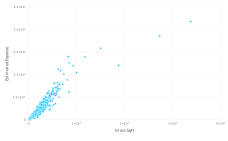

In [10]:
plot(housing, x="Gross.SqFt", y="Estimated.Expense")

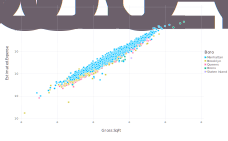

In [11]:
plot(housing, x="Gross.SqFt", y="Estimated.Expense", Scale.x_log, Scale.y_log10, color="Boro")

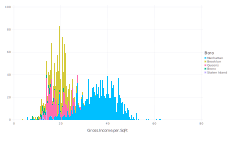

In [14]:
plot(housing, x="Gross.Income.per.SqFt", Geom.histogram, color="Boro")

In [20]:
bronx = @from row in housing begin
        @where row.Boro == "Bronx"
        @select row
        @collect DataFrame
end

69×13 DataFrame. Omitted printing of 10 columns
│ Row │ Neighborhood              │ Building.Classification │ Total.Units │
│     │ String                    │ String                  │ Int64       │
├─────┼───────────────────────────┼─────────────────────────┼─────────────┤
│ 1   │ MOTT HAVEN/PORT MORRIS    │ R2-CONDOMINIUM          │ 11          │
│ 2   │ MORRISANIA/LONGWOOD       │ R4-CONDOMINIUM          │ 61          │
│ 3   │ MORRISANIA/LONGWOOD       │ R4-CONDOMINIUM          │ 128         │
│ 4   │ MORRISANIA/LONGWOOD       │ R4-CONDOMINIUM          │ 58          │
│ 5   │ MORRISANIA/LONGWOOD       │ R4-CONDOMINIUM          │ 90          │
│ 6   │ MORRISANIA/LONGWOOD       │ R9-CONDOMINIUM          │ 110         │
│ 7   │ MORRISANIA/LONGWOOD       │ R9-CONDOMINIUM          │ 88          │
│ 8   │ HIGHBRIDGE/MORRIS HEIGHTS │ R4-CONDOMINIUM          │ 28          │
│ 9   │ MORRISANIA/LONGWOOD       │ R2-CONDOMINIUM          │ 8           │
│ 10  │ MORRISANIA/LONGWOOD       │ R2-CONDOMINIUM          │ 13          │
⋮
│ 59  │ RIVERDALE                 │ R4-CONDOMINIUM          │ 26          │
│ 60  │ RIVERDALE                 │ R4-CONDOMINIUM          │ 32          │
│ 61  │ RIVERDALE                 │ R2-CONDOMINIUM          │ 9           │
│ 62  │ RIVERDALE                 │ R4-CONDOMINIUM          │ 31          │
│ 63  │ RIVERDALE                 │ R4-CONDOMINIUM          │ 15          │
│ 64  │ RIVERDALE                 │ R4-CONDOMINIUM          │ 23          │
│ 65  │ RIVERDALE                 │ R4-CONDOMINIUM          │ 68          │
│ 66  │ RIVERDALE                 │ R4-CONDOMINIUM          │ 12          │
│ 67  │ RIVERDALE                 │ R4-CONDOMINIUM          │ 11          │
│ 68  │ RIVERDALE                 │ R4-CONDOMINIUM          │ 177         │
│ 69  │ RIVERDALE                 │ R2-CONDOMINIUM          │ 12          │

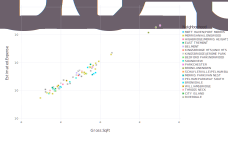

In [21]:
plot(bronx, x="Gross.SqFt", y="Estimated.Expense", Scale.x_log, Scale.y_log10, color="Neighborhood")